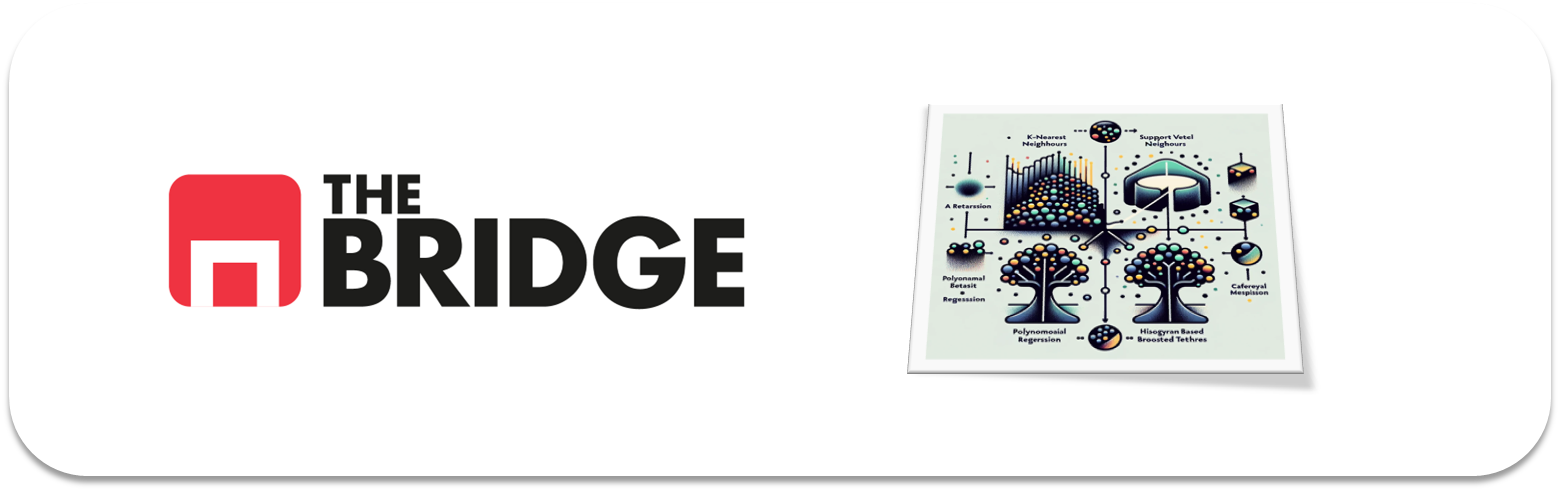

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import bootcampviztools as viz

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [3]:
df = pd.read_csv("./data/wines_dataset.csv", sep="|")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


No hay valores nulos y todas las columnas son numéricas excepto "class" que es categórica binaria

### 1.1. Distribución del *target* para el problema de clasificación

Definimos a la variable "quality" como *target* para el problema de clasificación

In [5]:
target_clf = "quality"

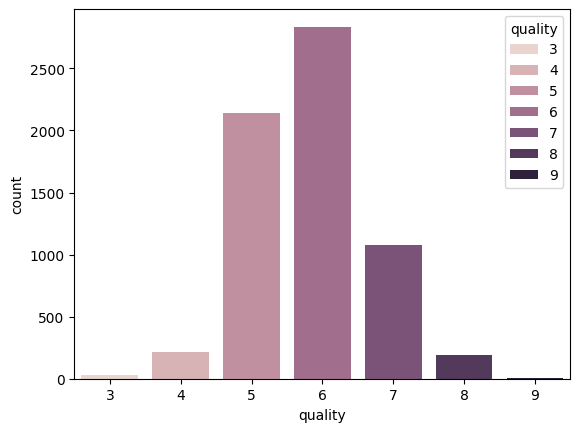

In [6]:
sns.countplot(df, x=target_clf, hue=target_clf);

In [7]:
df[target_clf].value_counts(normalize=True)

quality
6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: proportion, dtype: float64

El dataset está desbalanceado:

* Las clases predominantes son 5, 6 y luego en menor medida la 7
* Las clases 3, 4, 8 y 9 están en menor proporcion (especialmente las clases 3 y 9)

Este desequilibrio influirá y hay que tenerlo en cuenta a la hora de modelar

### 1.2. Distribución del *target* para el problema de regresión

Definimos a la variable "alcohol" como *target* para el problema de regresión

In [9]:
target_reg = "alcohol"

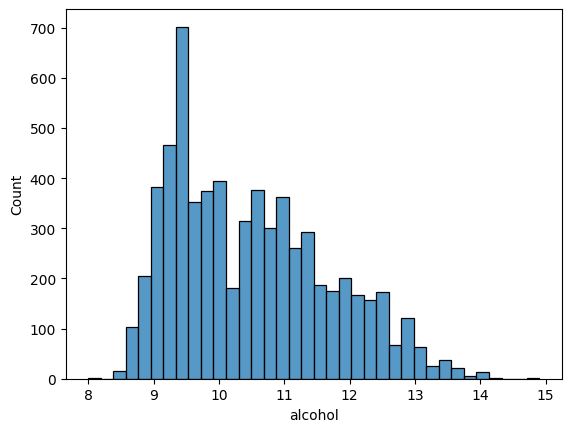

In [10]:
sns.histplot(df, x=target_reg);

Se observa una distribución centrada y ligeramente normal. Éstas características de la distribución ayudan a los modelos de regresión

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

### 2.1. Proceso EDA

Realizamos la división en train y test con la relación 80/20 pero estratificamos segun el *target* ya que hay clases con tan pocos valores que podría suceder que al hacer la división no haya ninguno en test

In [11]:
train_set, test_set = train_test_split(df, test_size=0.2, stratify=df[target_clf], random_state=42)

In [12]:
train_set[target_clf].value_counts(normalize=True)

quality
6    0.436598
5    0.329036
7    0.166057
4    0.033288
8    0.029632
3    0.004618
9    0.000770
Name: proportion, dtype: float64

In [13]:
test_set[target_clf].value_counts(normalize=True)

quality
6    0.436154
5    0.329231
7    0.166154
4    0.033077
8    0.030000
3    0.004615
9    0.000769
Name: proportion, dtype: float64

### 2.1.1. Variables numéricas

Realizamos el análisis univariante

In [14]:
columnas_numericas = [columna for columna in df.columns.tolist() if columna != target_clf and columna != "class"]
columnas_numericas

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [15]:
train_set.describe()[columnas_numericas].T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5197.0,7.225159,1.305226,3.80000,6.4000,7.00000,7.700,15.90000
volatile acidity,5197.0,0.338890,0.162974,0.08000,0.2300,0.29000,0.400,1.33000
citric acid,5197.0,0.317801,0.145208,0.00000,0.2400,0.31000,0.390,1.66000
residual sugar,5197.0,5.458187,4.794210,0.60000,1.8000,3.00000,8.100,65.80000
chlorides,5197.0,0.055968,0.033980,0.00900,0.0380,0.04700,0.065,0.46700
free sulfur dioxide,5197.0,30.649413,17.896279,1.00000,17.0000,29.00000,41.000,289.00000
total sulfur dioxide,5197.0,116.021840,56.642512,6.00000,77.0000,118.00000,156.000,440.00000
density,5197.0,0.994732,0.003006,0.98711,0.9924,0.99494,0.997,1.03898
pH,5197.0,3.217982,0.159441,2.74000,3.1100,3.21000,3.320,4.01000
sulphates,5197.0,0.531459,0.147496,0.22000,0.4300,0.51000,0.600,1.98000


(11, 2)


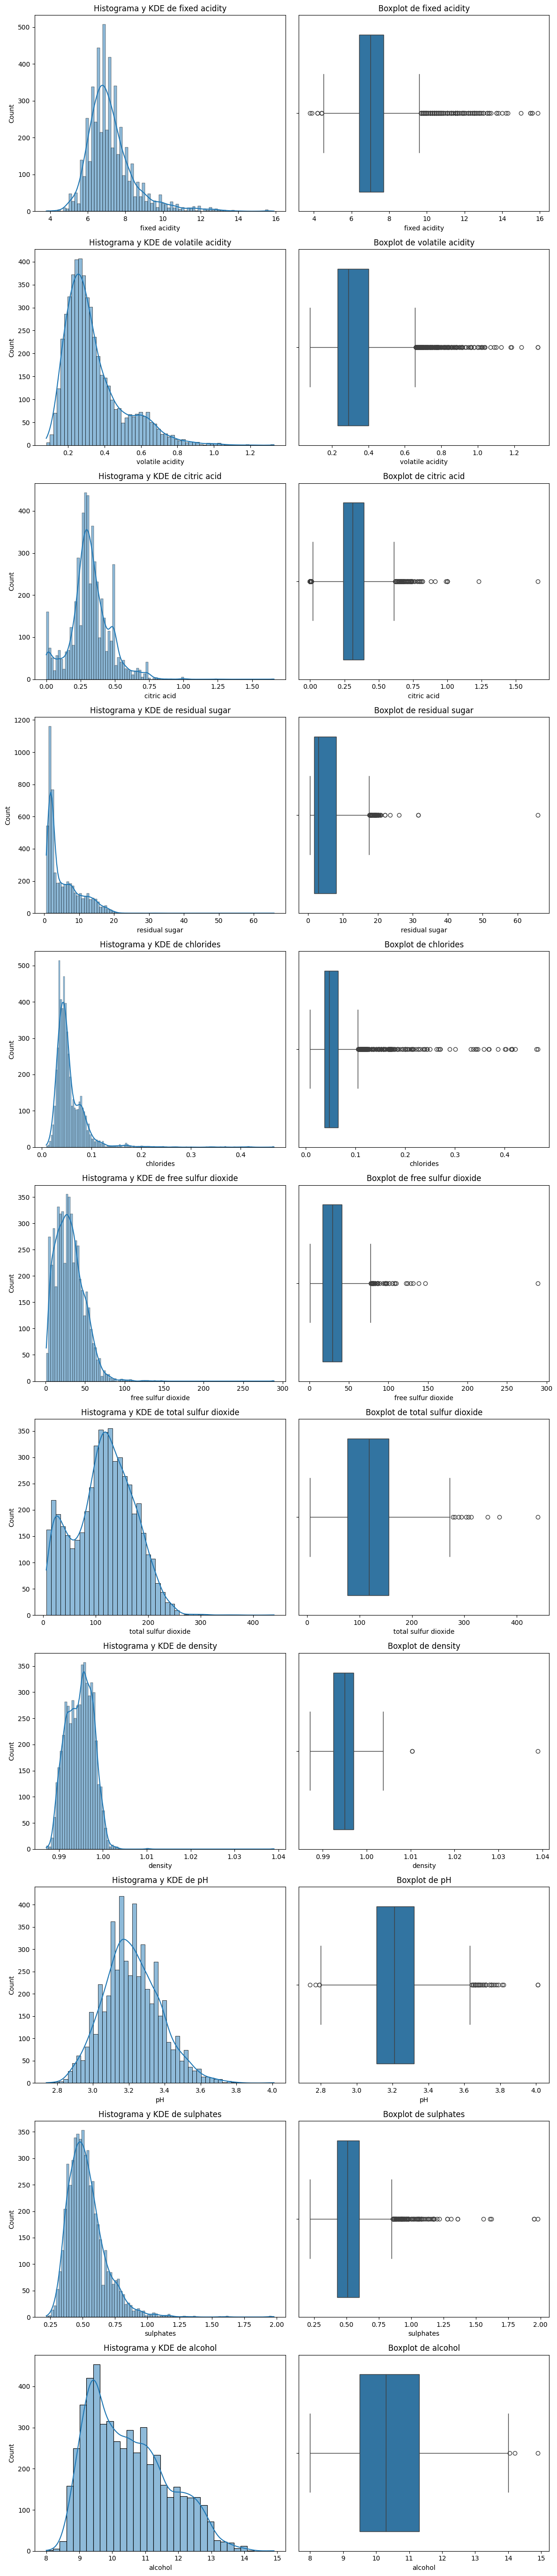

In [16]:
viz.plot_combined_graphs(train_set, columns=columnas_numericas)

Comentarios:
* En general, todas las variables presentan agrupación
* Casi todas las variables están descentradas, excepto "pH"
* Las variables "fixed acidity", "volatile acidity", "citric acid", "chlorides", "free sulfure dioxide" y "sulphates" presentan distribución con *heavy-tail*

Realizamos el análisis bivariante de las variables numéricas con el *target*

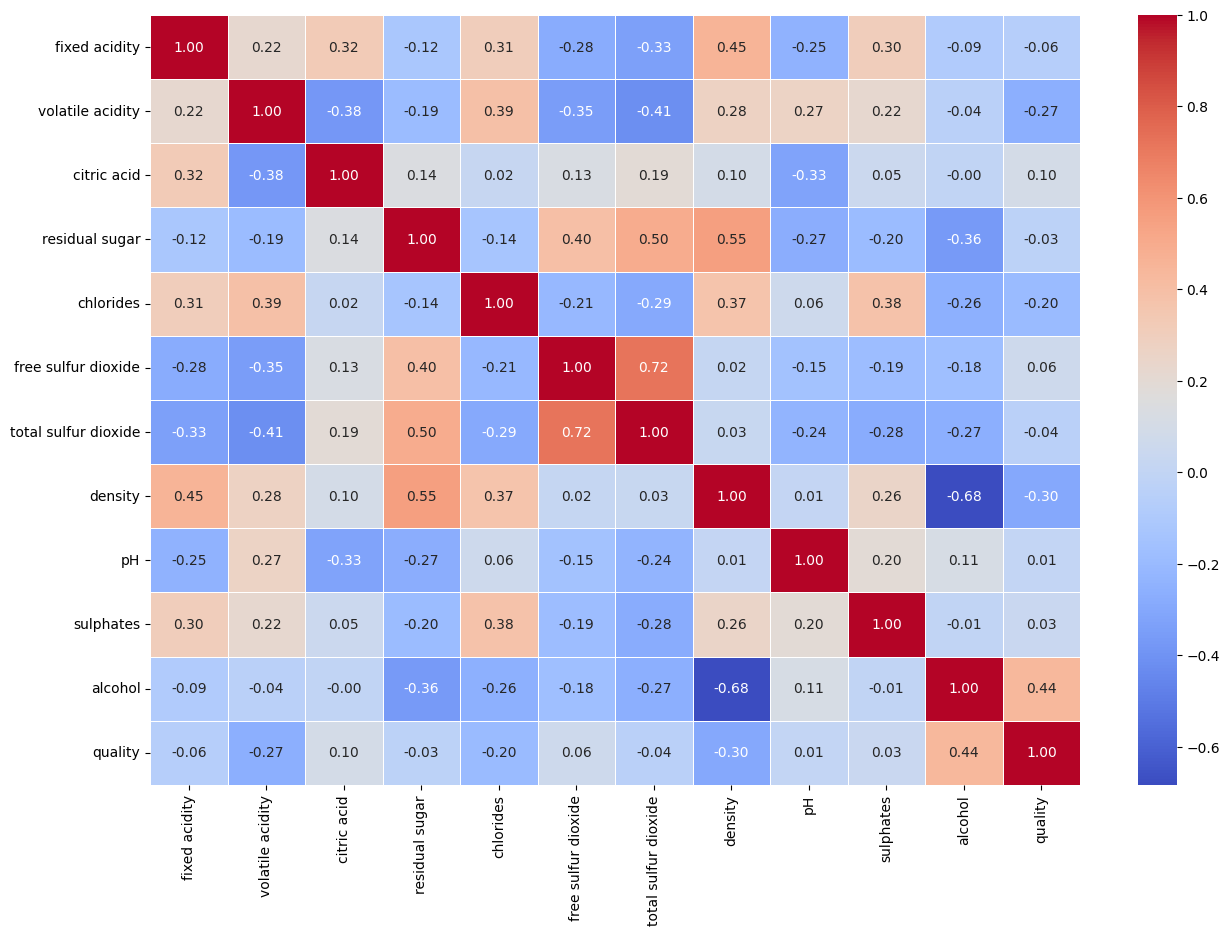

In [17]:
correlation_matrix = train_set[columnas_numericas+[target_clf]].corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar=True);

In [18]:
correlaciones = train_set.corr(numeric_only= True)
correlaciones[[target_clf]].abs().sort_values(by=target_clf, ascending=False)

,quality
quality,1.000000
alcohol,0.439689
density,0.295533
volatile acidity,0.266623
chlorides,0.202787
citric acid,0.095983
free sulfur dioxide,0.062885
fixed acidity,0.061450
total sulfur dioxide,0.041013
sulphates,0.033801


Las variables que mayor correlación presentan con el *target* son las siguientes:
* alcohol. Además, ésta variable tiene cierta correlación con "chlorides" y alta con "density"
* density. Además, ésta variable tiene cierta correlación con "volatile acidity", "chlorides" y alta con "alcohol"
* volatile acidity. Además, ésta variable tiene cierta correlación con "density", "citric acid" y "chlorides"
* chlorides. Además, ésta variable tiene cierta correlación con "alcohol", "volatile acidity" y "density"
* citric acid. Además, ésta variable tiene cierta correlación con "volatile acidity"

Existe una alta correlación entre "density y "alcohol" (68%), por lo que sólo nos vamos a quedar con la variable "alcohol" por tener mayor correlación con el *target*

Visualizamos los histogramas de las variables numéricas

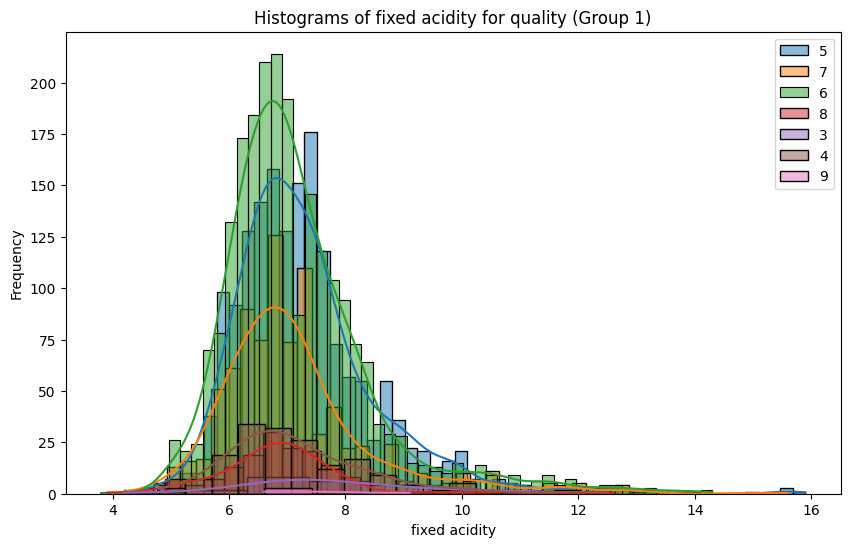

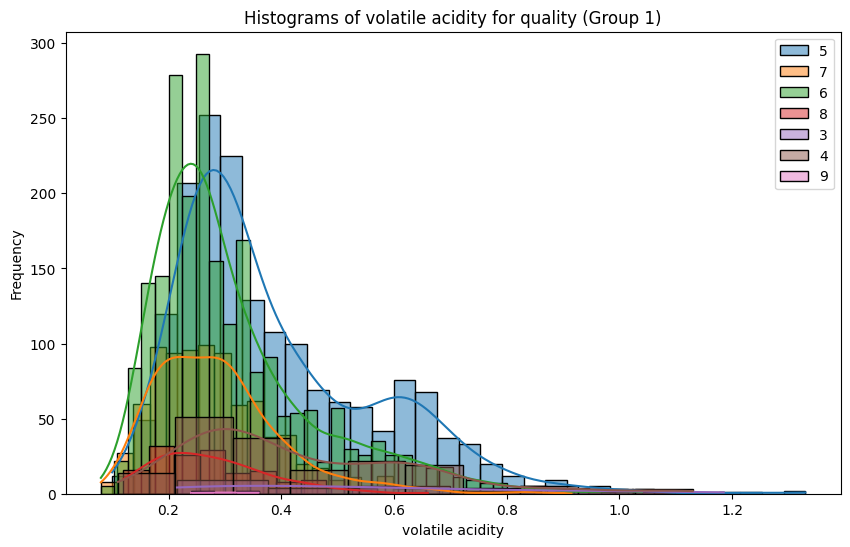

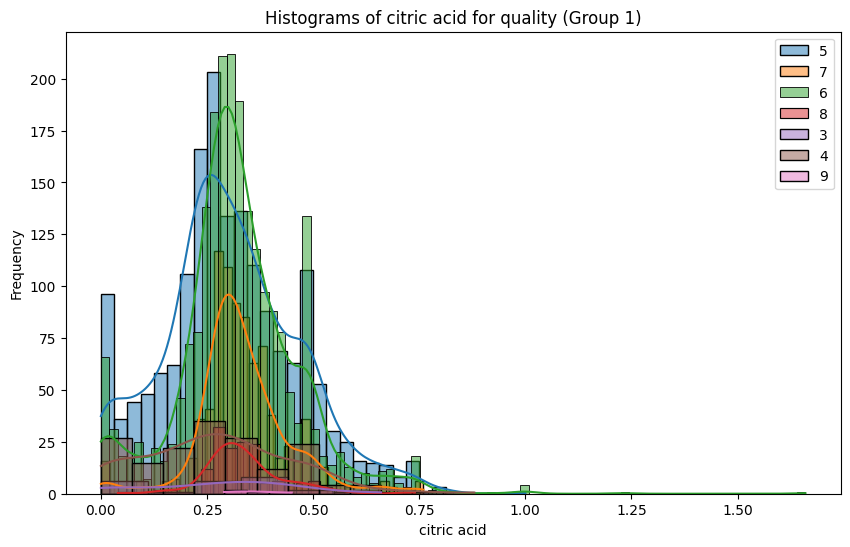

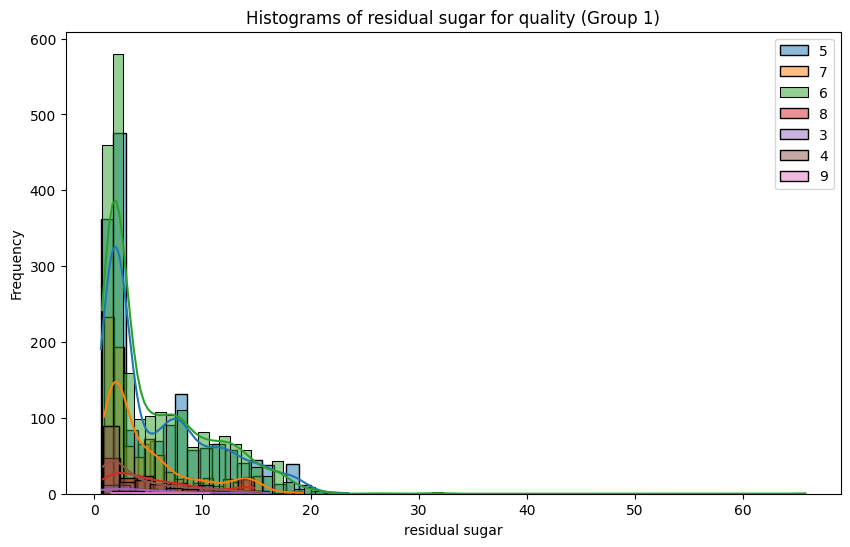

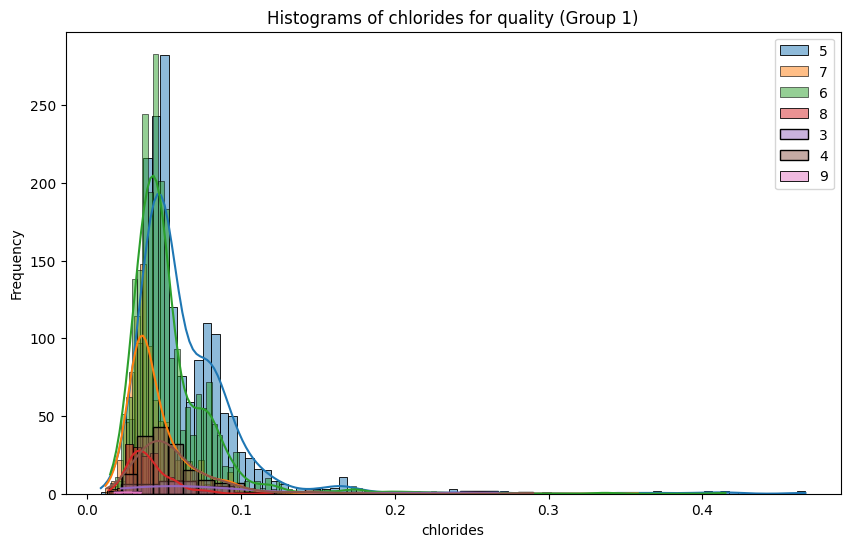

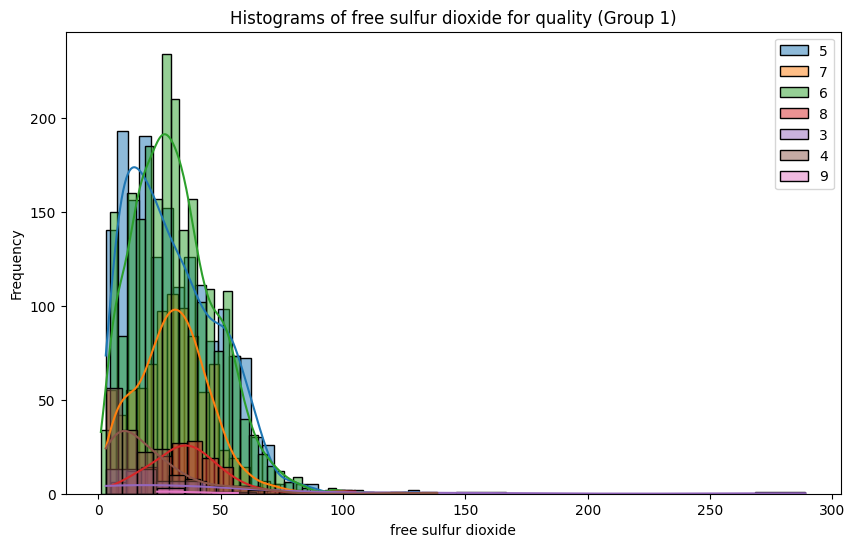

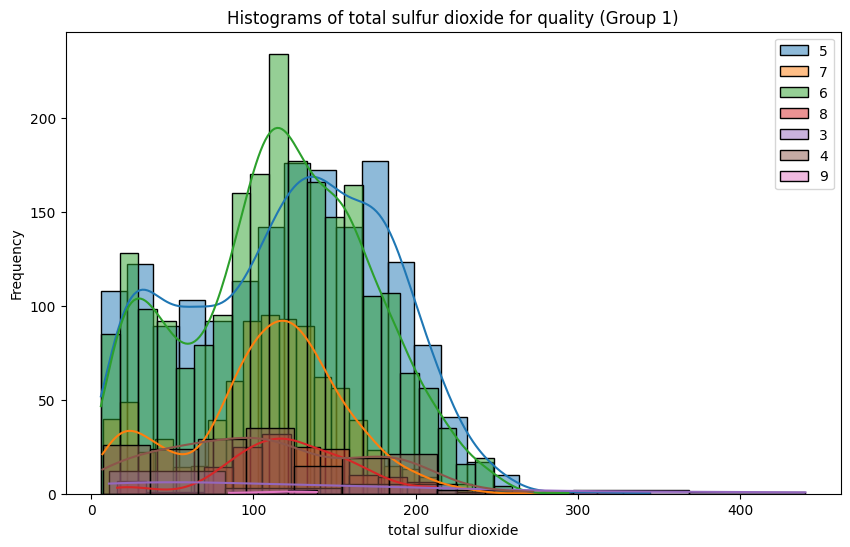

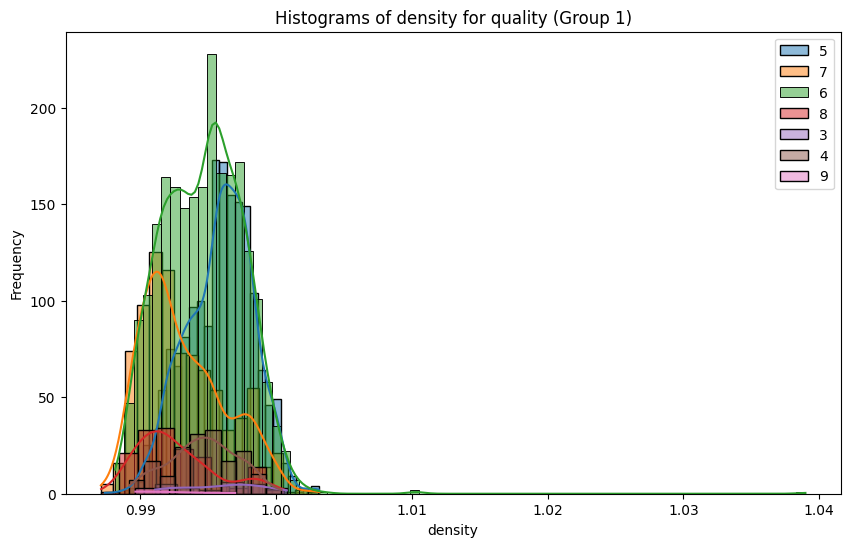

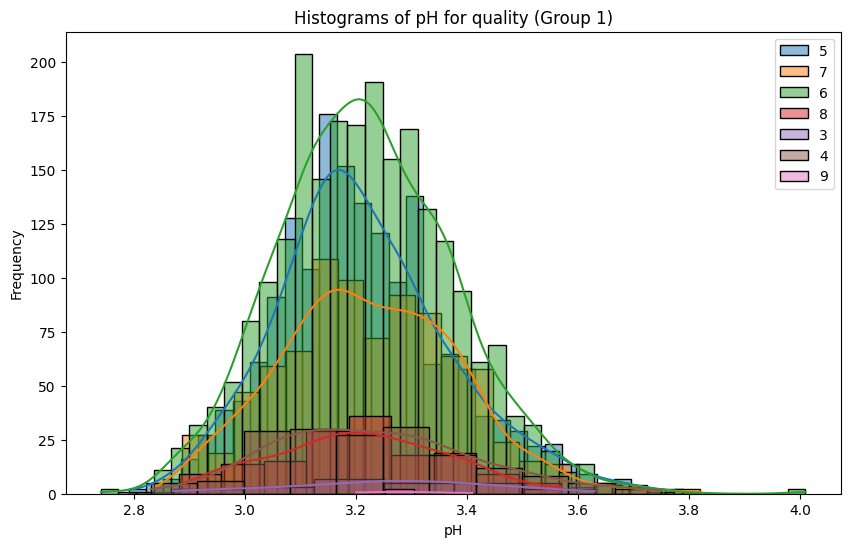

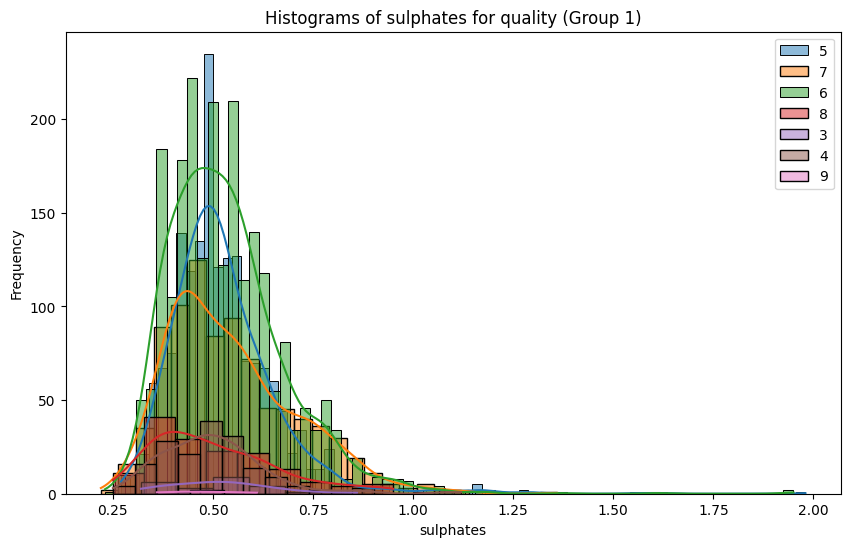

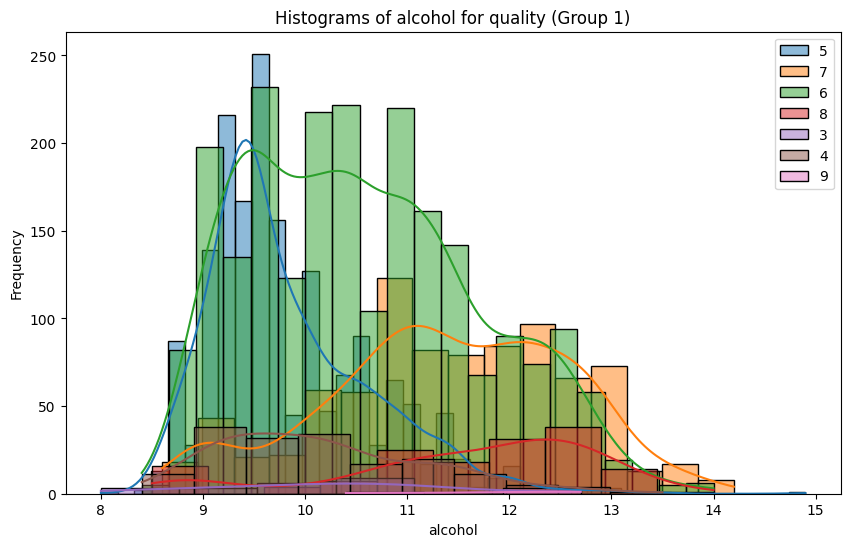

In [19]:
for columna_numerica in columnas_numericas:
    viz.plot_grouped_histograms(train_set, cat_col=target_clf, num_col=columna_numerica, group_size=7)

Observando las distribuciones podemos tomar las *features* indicadas anteriormente mediante el estudio de las correlaciones, y además incluiremos la variable "free sulfur dioxide" como *feature* numérica (no incluimos la variable "total sulfur dioxide" porque correla un 72% con "free sulfur dioxide")

In [21]:
features_num = ["alcohol", "volatile acidity", "chlorides", "citric acid", "free sulfur dioxide"]
features_num

['alcohol',
 'volatile acidity',
 'chlorides',
 'citric acid',
 'free sulfur dioxide']

### 2.1.2. Variables categóricas

Realizamos el análisis univariante de las variables categóricas

In [22]:
columnas_categoricas = ["class"]

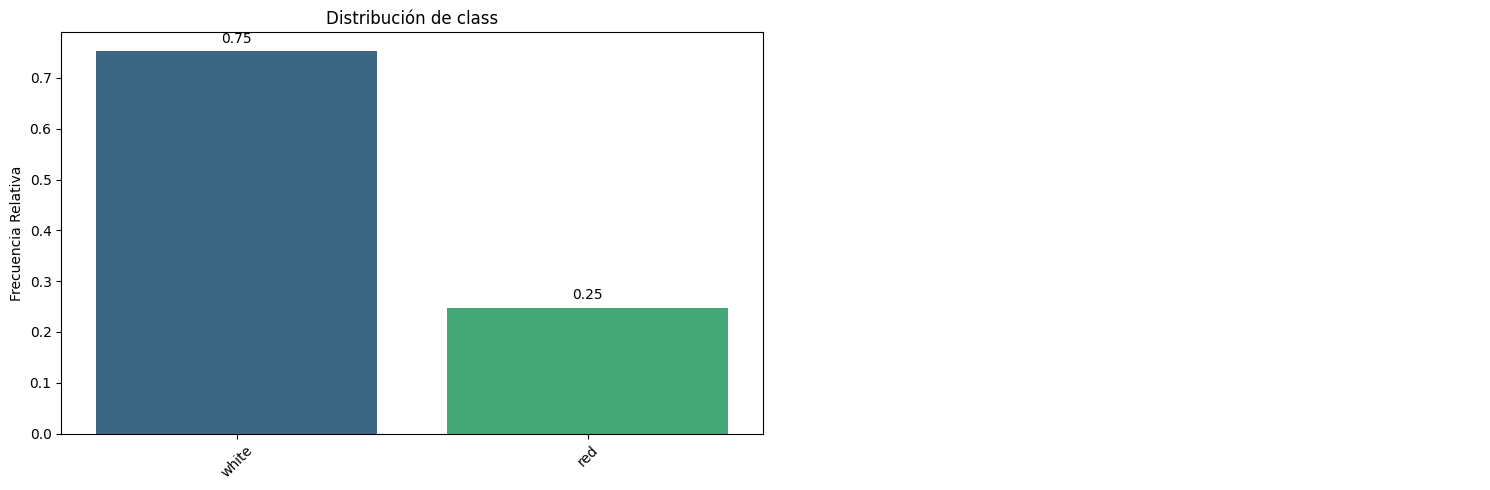

In [23]:
viz.pinta_distribucion_categoricas(train_set, columnas_categoricas=columnas_categoricas, relativa=True, mostrar_valores=True)

Hay una distribución desbalanceada hacia la categoría "white" (75%) frente a la categoría "red" (25%)

Realizamos el análisis bivariante de las variables categóricas con el *target*

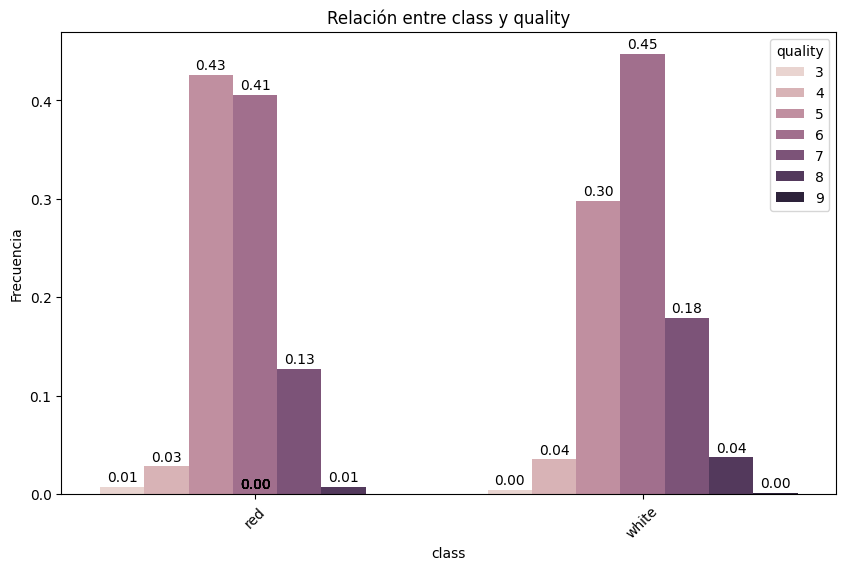

In [24]:
for columna_categoria in columnas_categoricas:
    viz.plot_categorical_relationship_fin(train_set, cat_col1=columna_categoria, cat_col2=target_clf, relative_freq=True, show_values=True, size_group=7)

Se observa que las distribuciones son diferentes para cada clase. Nos la quedamos como *feature* categórica

In [25]:
features_cat = columnas_categoricas
features_cat

['class']

**COMENTARIO**: Si siguieramos un proceso riguroso, las relaciones de las variables con el *target* se deben confirmar mediante los correspondientes tests. En este caso, y por simplicidad ya que no es el objetivo principal del bloque, no se realizan

### 2.2. Tratamiento de *features*

### 2.2.1. *Features* numéricas

Aplicaremos el tratamiento para adecuar las *features* numéricas para los modelos que son sensibles a las escalas

,count,mean,std,min,25%,50%,75%,max
alcohol,5197.0,10.478466,1.185101,8.000,9.500,10.300,11.300,14.900
volatile acidity,5197.0,0.338890,0.162974,0.080,0.230,0.290,0.400,1.330
chlorides,5197.0,0.055968,0.033980,0.009,0.038,0.047,0.065,0.467
citric acid,5197.0,0.317801,0.145208,0.000,0.240,0.310,0.390,1.660
free sulfur dioxide,5197.0,30.649413,17.896279,1.000,17.000,29.000,41.000,289.000


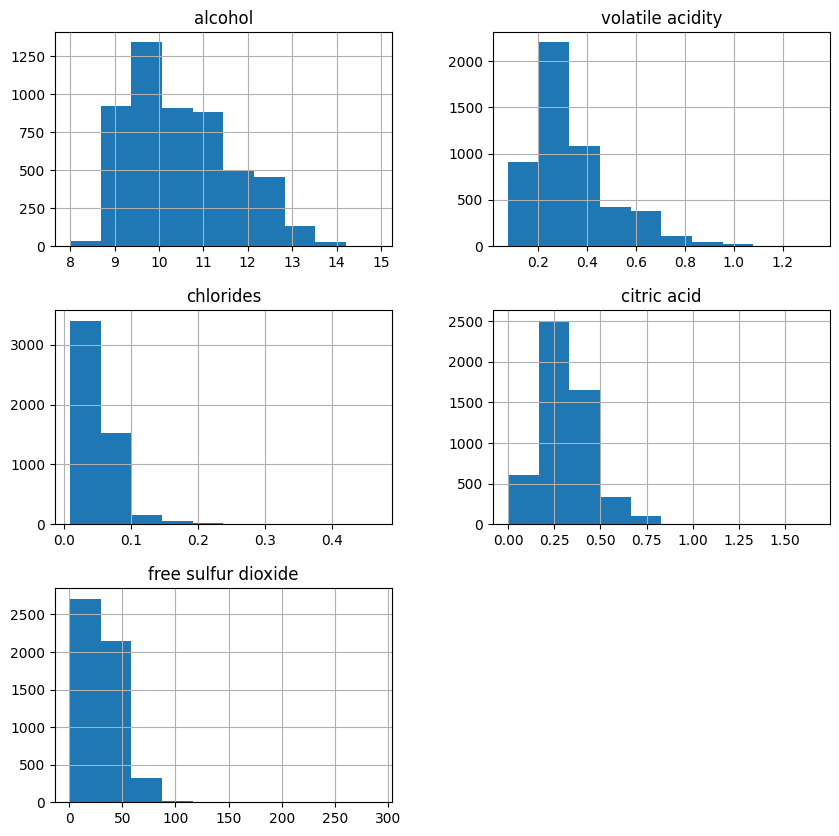

In [26]:
train_set[features_num].hist(figsize=(10,10));
train_set[features_num].describe().T

Presentan rangos diversos y además convendría aplicar la raiz cúbica a las variables que no están centradas para tratar de normalizarlas

Aplicamos la raíz cúbica (no aplicamos el logaritmo porque hay algunas variables con valores a 0) a los valores para tratar de centrarlos, tanto en train como en test 

In [27]:
#Creamos una lista con las columnas a aplicar la raiz cúbica
columnas_cbrt = [columna for columna in features_num if columna != "alcohol"]
columnas_cbrt

['volatile acidity', 'chlorides', 'citric acid', 'free sulfur dioxide']

In [28]:
#Realizamos una copia del DataFrame de train y test originales
train_set_escalado = train_set.copy()
test_set_escalado = test_set.copy()

#Aplicamos la raiz cúbica
for columna in columnas_cbrt:
    train_set_escalado[columna] = train_set_escalado[columna].apply(np.cbrt)
    test_set_escalado[columna] = test_set_escalado[columna].apply(np.cbrt)

Visualizamos la distribución de las *features* numéricas de train tras aplicar la raiz cúbica

,count,mean,std,min,25%,50%,75%,max
alcohol,5197.0,10.478466,1.185101,8.000000,9.500000,10.300000,11.300000,14.900000
volatile acidity,5197.0,0.681742,0.102098,0.430887,0.612693,0.661911,0.736806,1.099724
chlorides,5197.0,0.373078,0.057612,0.208008,0.336198,0.360883,0.402073,0.775840
citric acid,5197.0,0.654652,0.151476,0.000000,0.621447,0.676790,0.730614,1.184048
free sulfur dioxide,5197.0,3.000764,0.640621,1.000000,2.571282,3.072317,3.448217,6.611489


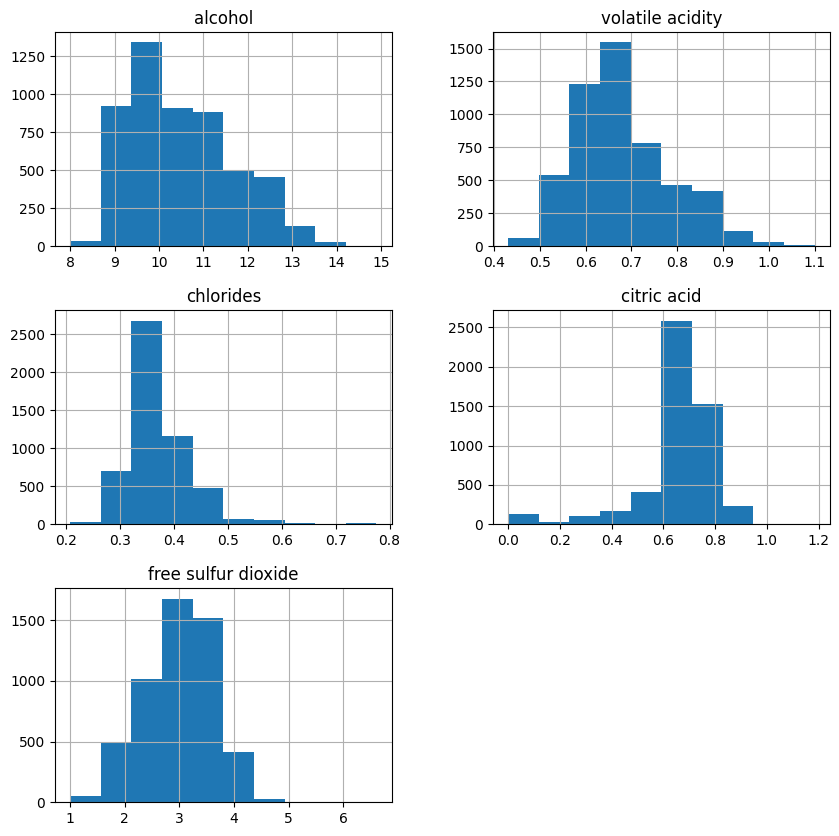

In [29]:
train_set_escalado[features_num].hist(figsize=(10,10))
train_set_escalado[features_num].describe().T

Aplicamos el escalado en train y test

In [30]:
scaler = StandardScaler()

scaler.fit(train_set_escalado[features_num]) #Hacemos el fit solo con los datos de train

train_set_escalado[features_num] = scaler.transform(train_set_escalado[features_num])
test_set_escalado[features_num] = scaler.transform(test_set_escalado[features_num])

Visualizamos la distribución de las *features* numéricas tras aplicar el escalado

,count,mean,std,min,25%,50%,75%,max
alcohol,5197.0,2.153367e-16,1.000096,-2.091556,-0.825719,-0.150606,0.693285,3.731294
volatile acidity,5197.0,-2.502007e-16,1.000096,-2.457251,-0.676377,-0.194262,0.539377,4.094337
chlorides,5197.0,-3.476150e-16,1.000096,-2.865440,-0.640201,-0.211692,0.503326,6.991572
citric acid,5197.0,-2.703672e-16,1.000096,-4.322230,-0.219232,0.146164,0.501531,3.495252
free sulfur dioxide,5197.0,-4.484472e-16,1.000096,-3.123464,-0.670480,0.111703,0.698535,5.636830


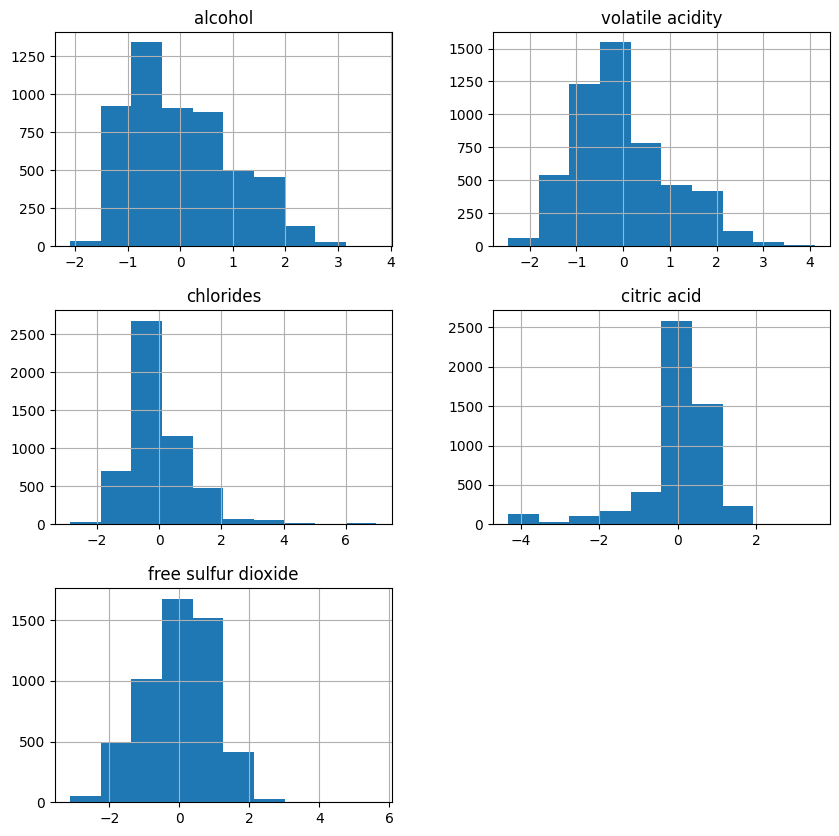

In [31]:
train_set_escalado[features_num].hist(figsize=(10,10))
train_set_escalado[features_num].describe().T

Obtenemos distribuciones centradas y con rango similares

### 2.2.2. *Features* categóricas

Relizaremos la conversión de los valores de la variable "class" a números mediante *One-Hot Encoding* tanto en train como en test

In [32]:
#Aplicamos One-Hot Encoding en los dos DataFrames de train (sin escalar y escalado)
train_set = pd.get_dummies(train_set, columns=["class"], dtype= int)
train_set_escalado = pd.get_dummies(train_set_escalado, columns=["class"], dtype= int)

#Aplicamos One-Hot Encoding en los dos DataFrames de test (sin escalar y escalado)
test_set = pd.get_dummies(test_set, columns=["class"], dtype= int)
test_set_escalado = pd.get_dummies(test_set_escalado, columns=["class"], dtype= int)

In [33]:
#Obtenemos las nuevas features categóricas tras aplicar One-Hot Encoding
features_cat = [columna for columna in train_set.columns if "_" in columna]
features_cat

['class_red', 'class_white']

### 2.3. Elección del modelo de clasificación

Creamos los DataFrames X e y

In [34]:
#Para los modelos no sensibles a las escalas
X_train = train_set[features_num+features_cat].copy()
y_train = train_set[target_clf].copy()

X_test = test_set[features_num+features_cat].copy()
y_test = test_set[target_clf].copy()

#Para los modelos sensibles a las escalas
X_train_escalado = train_set_escalado[features_num+features_cat].copy()
X_test_escalado = test_set_escalado[features_num+features_cat].copy()

Creamos el modelo KNN como baseline con K = 2 y K=5 y evaluamos contra train con el classification report

In [35]:
base_knn2_clf = KNeighborsClassifier(n_neighbors = 2)
base_knn2_clf.fit(X_train_escalado,y_train)

KNeighborsClassifier(n_neighbors=2)

In [36]:
report = classification_report(y_train, base_knn2_clf.predict(X_train_escalado))
print(report)

              precision    recall  f1-score   support

           3       0.62      1.00      0.76        24
           4       0.64      0.99      0.77       173
           5       0.77      0.97      0.86      1710
           6       0.87      0.79      0.83      2269
           7       0.94      0.64      0.76       863
           8       0.97      0.44      0.61       154
           9       0.00      0.00      0.00         4

    accuracy                           0.82      5197
   macro avg       0.68      0.69      0.65      5197
weighted avg       0.84      0.82      0.81      5197



c:\Users\7681\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\7681\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\7681\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [37]:
base_knn5_clf = KNeighborsClassifier(n_neighbors = 5)
base_knn5_clf.fit(X_train_escalado,y_train)

KNeighborsClassifier()

In [38]:
report = classification_report(y_train, base_knn5_clf.predict(X_train_escalado))
print(report)

              precision    recall  f1-score   support

           3       0.60      0.12      0.21        24
           4       0.57      0.27      0.36       173
           5       0.68      0.76      0.72      1710
           6       0.69      0.74      0.72      2269
           7       0.67      0.54      0.60       863
           8       0.69      0.30      0.42       154
           9       0.00      0.00      0.00         4

    accuracy                           0.68      5197
   macro avg       0.56      0.39      0.43      5197
weighted avg       0.68      0.68      0.67      5197



c:\Users\7681\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\7681\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\7681\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Comentarios:
* Si atendemos al *recall* medio nos sale mejor con K=2 (un 69%)
* Las clases 3, 4, 5, 6 y 7 tienen buen (o aceptables) *recall* y *precision*
* La clase 8 tiene un *recall* bajo
* La clase 9 tiene *recall* y *precision* nulos

Instanciamos los modelos que servirán de *baseline* y buscamos la optimización de sus hiperparámetros para escoger el modelo mediante validación cruzada

In [39]:
#Regresión logística
base_rl_clf = LogisticRegression(max_iter = 10000, random_state = 42) 

#RandomForest
base_rf_clf = RandomForestClassifier(max_depth = 3, random_state= 42)

#KNN
base_knn_clf = KNeighborsClassifier(n_neighbors = 2)

**Optimización Regresión Logística**

In [40]:
grid_rl = {
    "C": [0.1, 1, 10, 100], # 
    "class_weight": ["balanced", None],
    "max_iter": [1000, 5000, 10000]
}

rl_grid = GridSearchCV(base_rl_clf, param_grid= grid_rl, cv = 4, scoring = "balanced_accuracy")
rl_grid.fit(X_train_escalado, y_train)

GridSearchCV(cv=4,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'max_iter': [1000, 5000, 10000]},
             scoring='balanced_accuracy')

**Optimización RandomForest**

In [41]:
grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight' : ["balanced", None]
}

rf_grid = GridSearchCV(base_rf_clf, param_grid= grid_rf, cv = 4, scoring= "balanced_accuracy")

rf_grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='balanced_accuracy')

**Optimización KNN**

In [42]:
grid_knn = {
    "n_neighbors": range(1,11),
    #"weights": ["uniform", "distance"]
}

knn_grid = GridSearchCV(base_knn_clf, param_grid = grid_knn, cv=4, scoring = "balanced_accuracy")

knn_grid.fit(X_train_escalado, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(n_neighbors=2),
             param_grid={'n_neighbors': range(1, 11)},
             scoring='balanced_accuracy')

Realizamos la validación cruzada para los modelos con los mejores hiperparámetros encontrados que los optimizan

In [43]:
val_score = {}

for nombre, modelo in zip(["LogisticRegression", "RandomForest", "KNN"],[rl_grid.best_estimator_, rf_grid.best_estimator_, knn_grid.best_estimator_]):
    
    print(f"Score en validación cruzada para {nombre}:")
    
    if nombre == "RandomForest":
        metricas = cross_val_score(modelo, X_train, y_train, cv = 4, scoring = "balanced_accuracy")

    else: 
        metricas = cross_val_score(modelo, X_train_escalado, y_train, cv = 4, scoring = "balanced_accuracy")
    
    balanced_accuracy = np.mean(metricas)
    print(balanced_accuracy)
        
    #Guardamos la métrica en el diccionario
    val_score[nombre] = balanced_accuracy
        
    print("\n")       

#Seleccionamos el modelo con la mejor métrica en validación cruzada
print(f"Modelo escogido en validación cruzada: {list(val_score.keys())[np.argmax(list(val_score.values()))]}")

Score en validación cruzada para LogisticRegression:
0.35613345712139827


Score en validación cruzada para RandomForest:
0.3662983729624312


Score en validación cruzada para KNN:
0.335812593355128


Modelo escogido en validación cruzada: RandomForest


Nos quedamos con el modelo RandomForest al obtener el mejor *recall* medio en validación cruzada, un 36.6%. Mostramos los hiperparámetros que han optimizado el modelo RandomForest

In [44]:
print(rf_grid.best_params_)

{'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}



Evaluamos con el classification report de train y test

In [45]:
#Predicciones de train
y_pred_train = rf_grid.best_estimator_.predict(X_train)

#Mostramos el classification report de train  
report_rf_train = classification_report(y_train, y_pred_train)
print("Classication report train:\n",  report_rf_train)

#Predicciones de test
y_pred_test = rf_grid.best_estimator_.predict(X_test)

#Mostramos el classification report de test
report_rf_test = classification_report(y_test, y_pred_test)
print("Classication report test:\n",report_rf_test)

Classication report train:
               precision    recall  f1-score   support

           3       0.33      0.83      0.47        24
           4       0.21      0.59      0.31       173
           5       0.53      0.68      0.60      1710
           6       0.61      0.17      0.27      2269
           7       0.36      0.37      0.36       863
           8       0.14      0.85      0.24       154
           9       0.33      1.00      0.50         4

    accuracy                           0.41      5197
   macro avg       0.36      0.64      0.39      5197
weighted avg       0.51      0.41      0.39      5197

Classication report test:
               precision    recall  f1-score   support

           3       0.08      0.17      0.11         6
           4       0.15      0.51      0.23        43
           5       0.53      0.64      0.58       428
           6       0.56      0.16      0.25       567
           7       0.32      0.31      0.31       216
           8       0.09

Comentarios:
* Se obtiene un modelo que generalizará mal para las clases 3, 8 y 9 (las clases minoritarias)
* La clase 6, pese a ser mayoritaria, solo tiene un *recall* del 16%
* El *recall* medio es bajo, un 34%

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

No me da tiempo a hacerlo antes de la clase del jueves 08/02 a las 20:00 y tengo que asistir a esa clase